In [1]:
import sys
sys.path.append("../") 

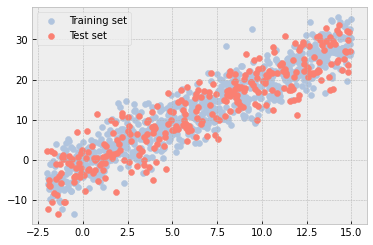

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import normal
plt.style.use('bmh')
%matplotlib inline

np.random.seed(3)

x = np.linspace(start = -2, stop=15, num=1000)
intercept, x_coef = -1, 2 
y = [x_coef*i + intercept for i in x]
y = [i+normal(0, 4) for i in y]

data = pd.DataFrame({'x': x, 'y': y})
        
# Split the data into training/testing sets
train, test = train_test_split(data, test_size=0.3)
X_train, X_test = train.x, test.x

# Split the targets into training/testing sets
y_train, y_test = train.y, test.y

plt.scatter(X_train, y_train, color='lightsteelblue', label = 'Training set')
plt.scatter(X_test, y_test, color='salmon', label = 'Test set')
plt.legend()

In [3]:
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
from hamiltonian import utils

model_ctx=mx.cpu()
par={'weights':nd.random_normal(shape=1,ctx=model_ctx),'bias':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':20.}

In [4]:
from hamiltonian.inference.sgd import sgd
from hamiltonian.models.linear import linear

model=linear(hyper,ctx=model_ctx)
inference=sgd(model,par,step_size=0.01,ctx=model_ctx)

In [5]:
X_train=X_train.values[:,np.newaxis]

In [6]:
model.negative_log_posterior(par,X_train=nd.array(X_train),y_train=nd.array(y_train))


[25.599966]
<NDArray 1 @cpu(0)>

In [7]:
par,loss=inference.fit(epochs=1000,batch_size=32,X_train=X_train,y_train=y_train)

100%|██████████| 1000/1000 [00:11<00:00, 87.99it/s]


In [10]:
X_test = nd.array(X_test.values[..., np.newaxis],ctx=model_ctx)
y_test = y_test.values

In [11]:
y_pred=model.predict(par,X_test)

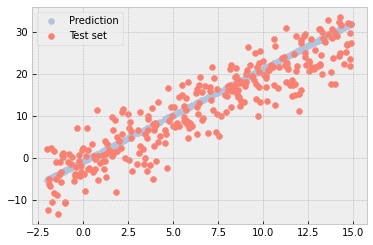

In [12]:
plt.scatter(X_test.asnumpy(), y_pred.mean.asnumpy(), color='lightsteelblue', label = 'Prediction')
plt.scatter(X_test.asnumpy(), y_test, color='salmon', label = 'Test set')
plt.legend()